# Labor market analysis

This analysis want to underline how the pandemic period change the world of work in Lombardia region.

We used two different dataSet taken from Lombardia official  web_Site:
- **Rapporti_di_lavoro_attivati.csv**.
- **Rapporti_di_lavoro_cessati.csv**

The analysis is divided into three part:
1. The first is focus on the "Rapporti_di_lavoro_attivati" dataSet that include a general view of the dataSet, the elimination of the ambigues values (e.g. NAN data, ...) and a comparison between the periods before and during Covid19.


2. The second is focus on the "Rapporti_di_lavoro_cessati" dataSet that include a general view of the dataSet, the elimination of the ambigues values (e.g. NAN data, ...) and a comparison between the periods before and during Covid19.


3. The third is focus on the comparison of the first and the second analysis.

____ 

__Import modules__

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

___

### __FIRST PART__

#### Load dataSet

In this session we are going to import the dataset with Pandas and we will see the main aspects of the dataset.

#### Description of table Columns:
- __Data__: the first time since the job contract started [day/month/year]
- __Genere__:sex of the worker [M: Male, F: Female]
- __Eta__: age of the worker [years]
- __Settore Economico Dettaglio__: business sector of the worker
- __Titolo Studio__: qualification of the worker
- __Contratto__: type of worker's contract
- __Provincia Impresa__: company headquarters
- __Italiano__: worker's nationality

In [2]:
## We will display DF head and tail
df_Rapporti_Attivati = pd.read_csv('Rapporti_di_lavoro_attivati.csv')
df_Rapporti_Attivati

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO
0,09/05/2020,F,60,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,BERGAMO,UCRAINA
1,12/07/2019,M,43,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA
2,05/06/2013,F,20,Fabbricazione di altre apparecchiature elettri...,LICENZA MEDIA,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA
3,12/03/2010,F,28,Alberghi,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO INTERMITTENTE A TEMPO DETERMINATO,NON DEFINITO,BERGAMO,ITALIA
4,06/04/2021,F,49,Rifugi di montagna,LICENZA MEDIA,LAVORO INTERMITTENTE,NON DEFINITO,BERGAMO,ITALIA
...,...,...,...,...,...,...,...,...,...
9579789,01/03/2020,M,52,Lavori di meccanica generale,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA
9579790,06/09/2010,M,61,Lavori di meccanica generale,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,BERGAMO,ALBANIA
9579791,06/11/2021,M,37,Fabbricazione di parti ed accessori per bicicl...,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,SENEGAL
9579792,02/02/2010,M,35,Fabbricazione di parti ed accessori per bicicl...,LICENZA MEDIA,LAVORO INTERINALE (O A SCOPO DI SOMMINISTRAZIO...,TEMPO PIENO,BERGAMO,SENEGAL


In [3]:
## We will see the number of rows and columns of the dataset
row = df_Rapporti_Attivati.shape[0]
column = df_Rapporti_Attivati.shape[1]
print(f'Rows {row}')
print(f'Column {column}')

Rows 9579794
Column 9


In [4]:
## We will see the values type of the columns
df_Rapporti_Attivati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9579794 entries, 0 to 9579793
Data columns (total 9 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   DATA                       object
 1   GENERE                     object
 2   ETA                        int64 
 3   SETTOREECONOMICODETTAGLIO  object
 4   TITOLOSTUDIO               object
 5   CONTRATTO                  object
 6   MODALITALAVORO             object
 7   PROVINCIAIMPRESA           object
 8   ITALIANO                   object
dtypes: int64(1), object(8)
memory usage: 657.8+ MB


___

__General data view__

In this paragraph we will explore the dataset with a global analysis. It includes:
1. Description in a single column: We will display the different values (e.g. count, average age, values type...) associated with the 'ETA' column.
2. Histogram visualization of the different age groups distribution.
3. Distribution for gender.
4. Through a pie chart we will see the distribution of the different 'PROVINCIAIMPRESA'.
5. Finally, we will display the number of jobs by gender for each city.

1. __Description in a single column__

In [5]:
df_Rapporti_Attivati.ETA.describe().round(2)

count    9579794.00
mean          35.30
std           11.78
min            0.00
25%           25.00
50%           34.00
75%           44.00
max          221.00
Name: ETA, dtype: float64

2. __Dristribution of 'ETA'__

Text(0, 0.5, 'Density')

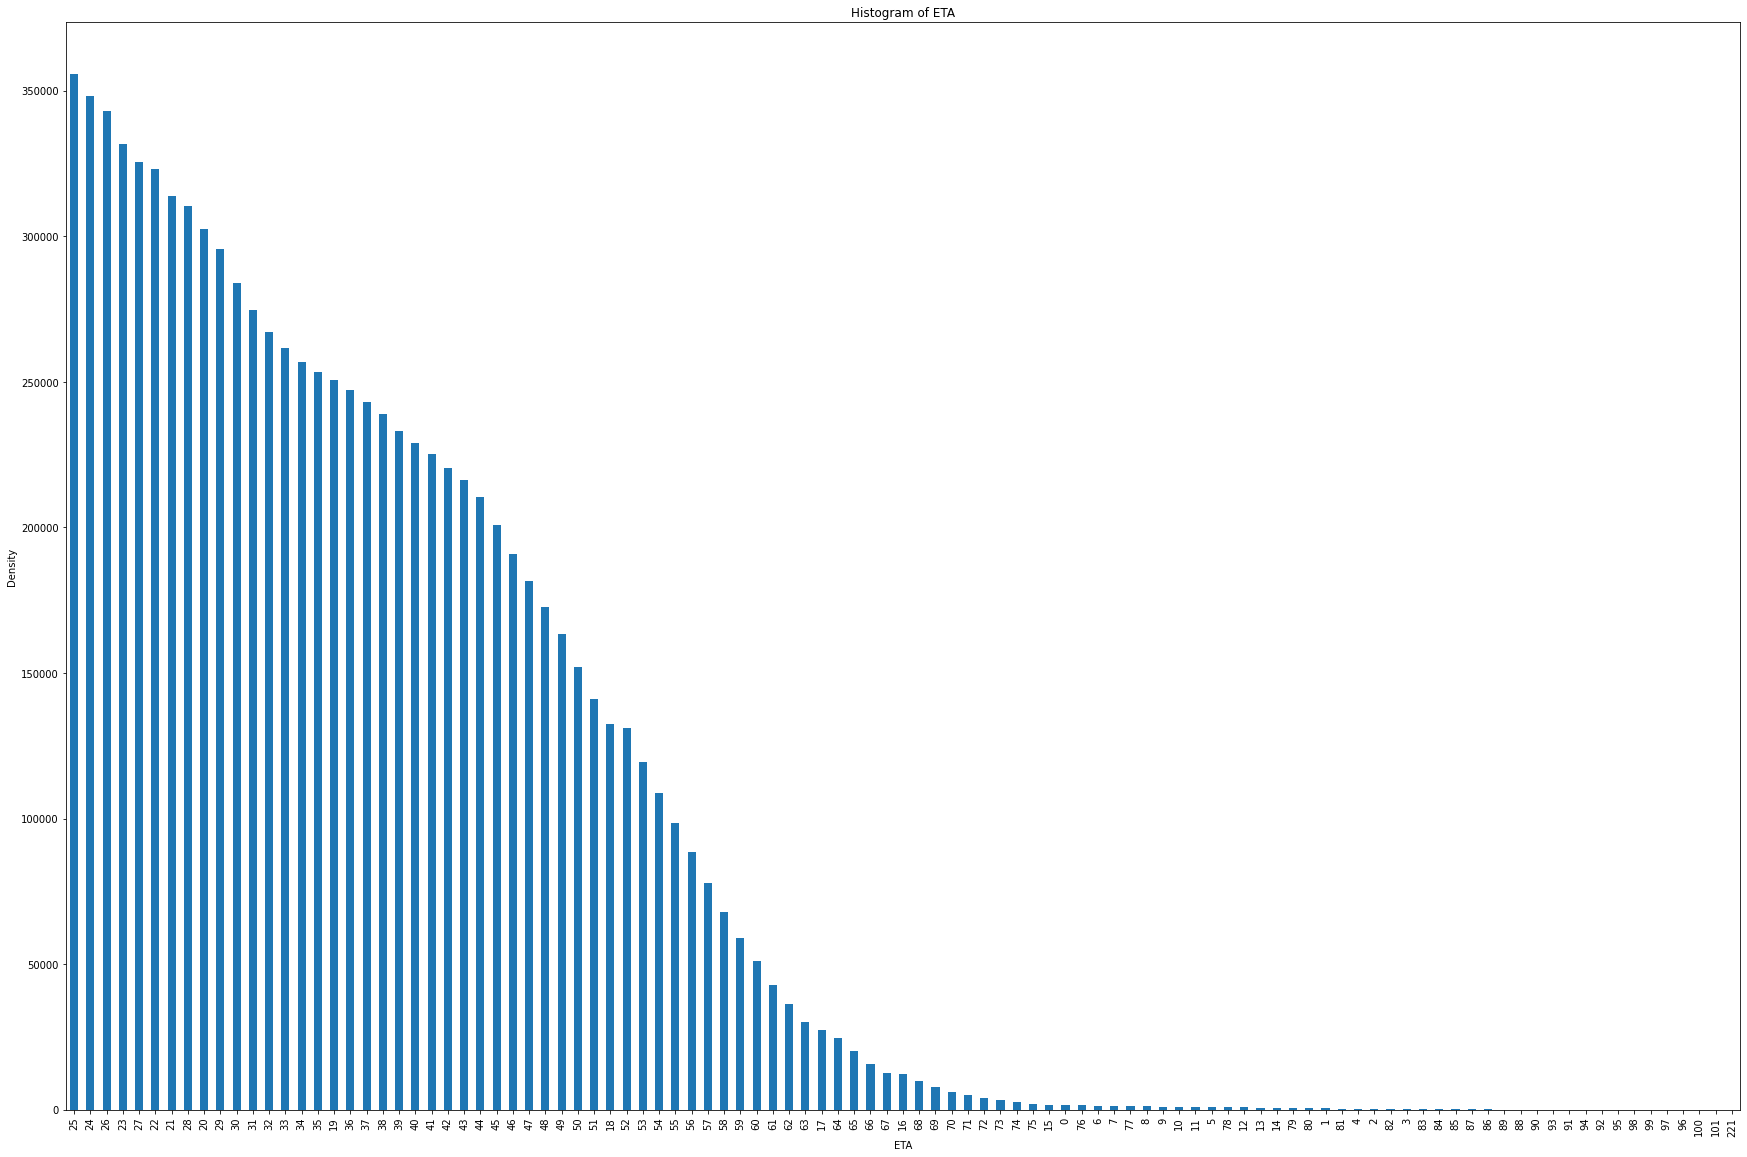

In [6]:
df_Rapporti_Attivati['ETA'].value_counts().plot(kind='bar', figsize=(30, 20))
plt.title('Histogram of ETA')
plt.xlabel('ETA')
plt.ylabel('Density')

3. __Distribution of 'GENERE'__

Text(0.5, 1.0, 'Distribution for GENERE')

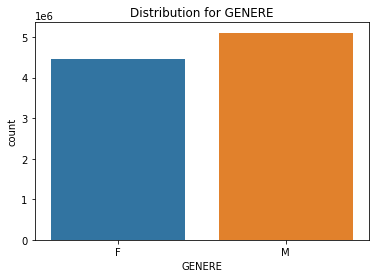

In [7]:
sns.countplot(x='GENERE', data=df_Rapporti_Attivati)
plt.title('Distribution for GENERE')

4. __Pie chart 'PROVINCIAIMPRESA'__

MILANO             4765803
BRESCIA            1167053
BERGAMO             806702
VARESE              548804
MONZA E BRIANZA     487469
COMO                381673
MANTOVA             357928
PAVIA               319569
CREMONA             241723
LECCO               203317
SONDRIO             161758
LODI                137995
Name: PROVINCIAIMPRESA, dtype: int64


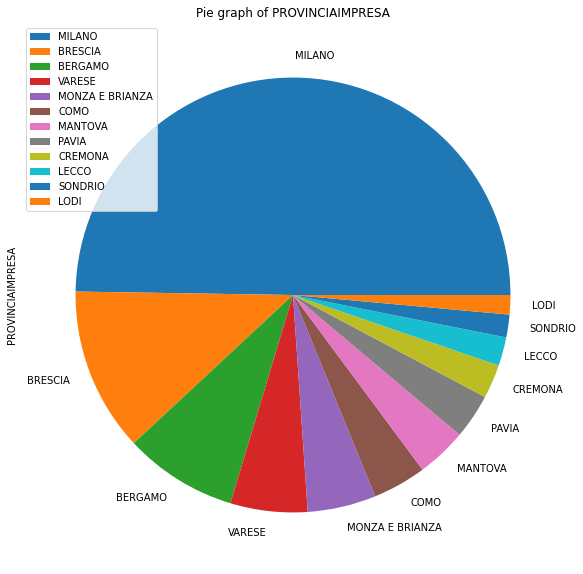

In [8]:
df_Rapporti_Attivati['PROVINCIAIMPRESA'].value_counts().plot(kind='pie', figsize=(10, 10))
plt.title('Pie graph of PROVINCIAIMPRESA')
plt.legend(loc=2)

print(df_Rapporti_Attivati['PROVINCIAIMPRESA'].value_counts())

5. __Distribution of Job for gender for each city__

Text(0.5, 1.0, 'Percentage of distribution in cities by gender')

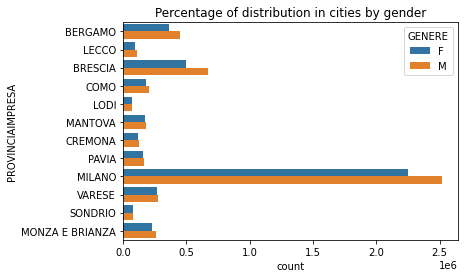

In [9]:
sns.countplot(y='PROVINCIAIMPRESA', hue='GENERE', data=df_Rapporti_Attivati)
plt.title('Percentage of distribution in cities by gender')

___

### __Data cleaning and preparing__

The initial analysis show an  ambiguities in the data (e.g. zero years old people, NAN values, ...).

In this session we will clean the dataSet through:

1. __Elimination of people with wrong age.__
2. __Elimination of all null values.__

1. __Elimination of people with wrong age.__

In this analysis we will take a range of age between 18 and 69

In [11]:
dropAge = df_Rapporti_Attivati[(df_Rapporti_Attivati['ETA'] >= 70) | (df_Rapporti_Attivati['ETA'] <= 17)].index

In [12]:
df_Rapporti_Attivati.drop(dropAge, inplace=True)

2. __Elimination of all null values.__

In [13]:
col = ['DATA', 'GENERE', 'ETA', 'SETTOREECONOMICODETTAGLIO', 'TITOLOSTUDIO', 'CONTRATTO', 
       'MODALITALAVORO', 'PROVINCIAIMPRESA','ITALIANO']

for column in col:
    df_Rapporti_Attivati.loc[df_Rapporti_Attivati[column] == '?', column] = np.nan

df_Rapporti_Attivati.dropna(axis = 0, inplace = True) 

___

### __Data analysis before and during Covid19__

After the previous analysis of the dataset, we will fill out the distribution of:
1. __Global business contract.__
2. __Before-Covid business contract.__
3. __During-Covid business contract.__

NOTE: during the analysis of the business contract distribution, we will consider the same range of time

In [14]:
data=df_Rapporti_Attivati['DATA']

In [15]:
year=[]
mounth=[]
day=[]
data_Complete=[]
for i in data:
    data1=datetime.strptime(i, "%d/%m/%Y")
    year.append(data1.year)
    mounth.append(data1.month)
    day.append(data1.day)
    data_Complete.append(data1)

In [16]:
df_Rapporti_Attivati.drop(['DATA'], axis=1, inplace=True)

In [17]:
df_Rapporti_Attivati['DATA'] = data_Complete
df_Rapporti_Attivati['YEAR'] = year
df_Rapporti_Attivati['MOUNTH'] = mounth
df_Rapporti_Attivati['DAY'] = day

In [18]:
df_Rapporti_Attivati

,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO,DATA,YEAR,MOUNTH,DAY
0,F,60.0,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,BERGAMO,UCRAINA,2020-05-09,2020,5,9
1,M,43.0,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA,2019-07-12,2019,7,12
2,F,20.0,Fabbricazione di altre apparecchiature elettri...,LICENZA MEDIA,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA,2013-06-05,2013,6,5
3,F,28.0,Alberghi,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO INTERMITTENTE A TEMPO DETERMINATO,NON DEFINITO,BERGAMO,ITALIA,2010-03-12,2010,3,12
4,F,49.0,Rifugi di montagna,LICENZA MEDIA,LAVORO INTERMITTENTE,NON DEFINITO,BERGAMO,ITALIA,2021-04-06,2021,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...
9579788,M,40.0,Lavori di meccanica generale,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ALGERIA,2019-08-07,2019,8,7
9579789,M,52.0,Lavori di meccanica generale,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA,2020-03-01,2020,3,1
9579790,M,61.0,Lavori di meccanica generale,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,BERGAMO,ALBANIA,2010-09-06,2010,9,6
9579791,M,37.0,Fabbricazione di parti ed accessori per bicicl...,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,SENEGAL,2021-11-06,2021,11,6


___

1. __Global Data Analysis__

In [19]:
global_Data_YEAR = df_Rapporti_Attivati.groupby(['YEAR']).MOUNTH.count()

In [20]:
global_Data_MOUNTH = df_Rapporti_Attivati.groupby(['MOUNTH']).YEAR.count()

Text(0, 0.5, 'COUNT')

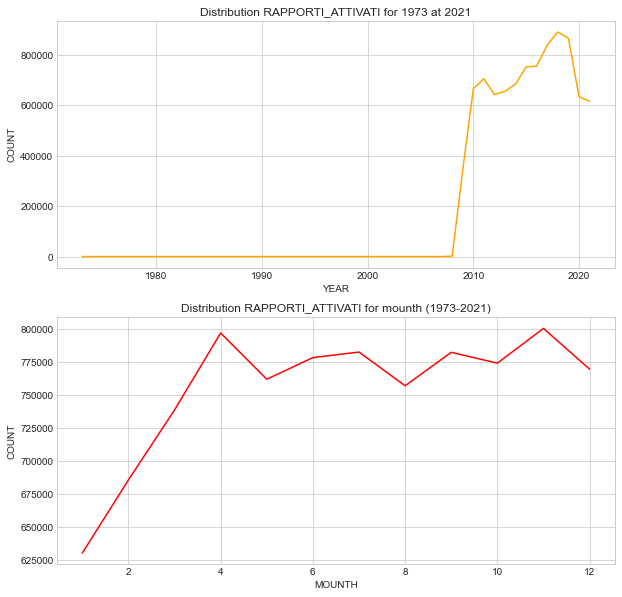

In [21]:
## crete a different subplot for two dataAnalysis
plt.style.use('seaborn-whitegrid')
figure = plt.figure(figsize=(10, 10))

x_dataY = global_Data_YEAR.index
y_dataY = global_Data_YEAR.values

x_dataM = global_Data_MOUNTH.index
y_dataM = global_Data_MOUNTH.values

plt.subplot(2, 1, 1)
plt.plot(x_dataY, y_dataY, color='orange')
plt.title('Distribution RAPPORTI_ATTIVATI for 1973 at 2021')
plt.xlabel('YEAR')
plt.ylabel('COUNT')

plt.subplot(2, 1, 2)
plt.plot(x_dataM, y_dataM, color='red')
plt.title('Distribution RAPPORTI_ATTIVATI for mounth (1973-2021)')
plt.xlabel('MOUNTH')
plt.ylabel('COUNT')

In [22]:
data_global_M = df_Rapporti_Attivati[(df_Rapporti_Attivati['GENERE'] == 'M')]
data_global_F = df_Rapporti_Attivati[(df_Rapporti_Attivati['GENERE'] == 'F')]

In [23]:
global_Data_YEAR_M = data_global_M.groupby(['MOUNTH']).GENERE.count()
global_Data_YEAR_F = data_global_F.groupby(['MOUNTH']).GENERE.count()

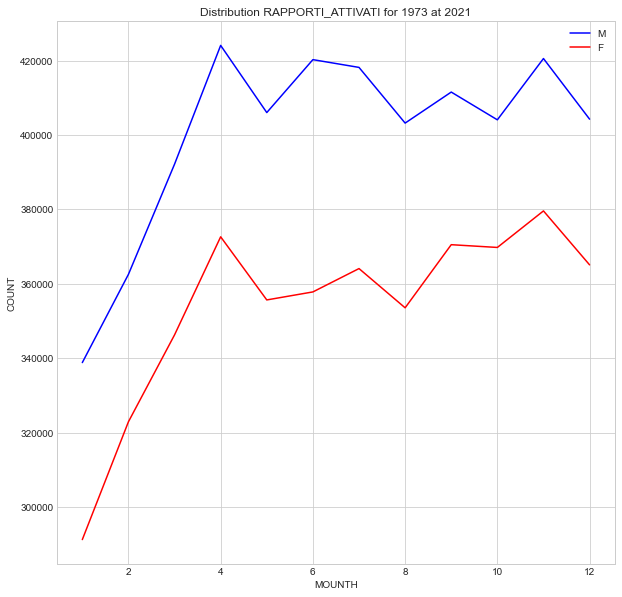

In [24]:
plt.style.use('seaborn-whitegrid')
figure = plt.figure(figsize=(10, 10))
ax = plt.axes()

x_dataY_M = global_Data_YEAR_M.index
y_dataY_M = global_Data_YEAR_M.values

x_dataY_F = global_Data_YEAR_F.index
y_dataY_F = global_Data_YEAR_F.values


ax.plot(x_dataY_M, y_dataY_M, color='blue', label='M')
ax.plot(x_dataY_F, y_dataY_F, color='red', label='F')
plt.title('Distribution RAPPORTI_ATTIVATI for 1973 at 2021')
plt.xlabel('MOUNTH')
plt.ylabel('COUNT')
plt.legend()

2. __Data Analysis Before covid__

In [25]:
data_Before_Covid = df_Rapporti_Attivati[(df_Rapporti_Attivati['YEAR'] == 2018) | 
                                         (df_Rapporti_Attivati['YEAR'] == 2019)]

In [26]:
global_Data_YEAR_Before_Covid = data_Before_Covid.groupby(['YEAR']).MOUNTH.count()

In [27]:
global_Data_MOUNTH_Before_Covid = data_Before_Covid.groupby(['MOUNTH']).YEAR.count()

Text(0, 0.5, 'COUNT')

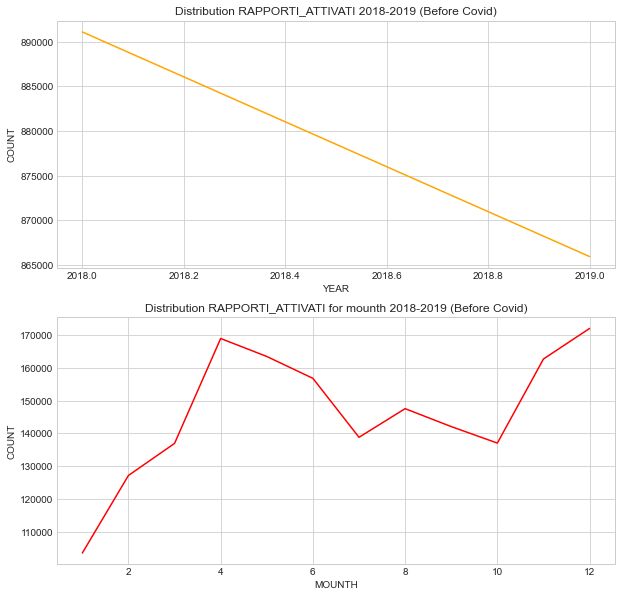

In [28]:
plt.style.use('seaborn-whitegrid')
figure = plt.figure(figsize=(10, 10))

x_dataY_BC = global_Data_YEAR_Before_Covid.index
y_dataY_BC = global_Data_YEAR_Before_Covid.values

x_dataM_BC = global_Data_MOUNTH_Before_Covid.index
y_dataM_BC = global_Data_MOUNTH_Before_Covid.values

plt.subplot(2, 1, 1)
plt.plot(x_dataY_BC, y_dataY_BC, color='orange')
plt.title('Distribution RAPPORTI_ATTIVATI 2018-2019 (Before Covid)')
plt.xlabel('YEAR')
plt.ylabel('COUNT')

plt.subplot(2, 1, 2)
plt.plot(x_dataM_BC, y_dataM_BC, color='red')
plt.title('Distribution RAPPORTI_ATTIVATI for mounth 2018-2019 (Before Covid)')
plt.xlabel('MOUNTH')
plt.ylabel('COUNT')

In [29]:
data_Before_Covid_M = df_Rapporti_Attivati[(df_Rapporti_Attivati['YEAR'] == 2018) | 
                                         (df_Rapporti_Attivati['YEAR'] == 2019) & (df_Rapporti_Attivati['GENERE'] == 'M')]

data_Before_Covid_F = df_Rapporti_Attivati[(df_Rapporti_Attivati['YEAR'] == 2018) | 
                                         (df_Rapporti_Attivati['YEAR'] == 2019) & (df_Rapporti_Attivati['GENERE'] == 'F')]

In [30]:
global_Data_YEAR_before_Covid_M = data_Before_Covid_M.groupby(['MOUNTH']).GENERE.count()
global_Data_YEAR_before_Covid_F = data_Before_Covid_F.groupby(['MOUNTH']).GENERE.count()

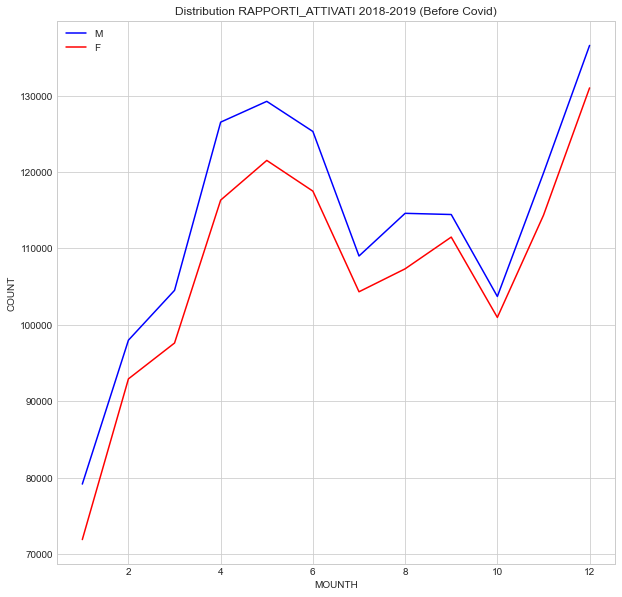

In [31]:
plt.style.use('seaborn-whitegrid')
figure = plt.figure(figsize=(10, 10))
ax = plt.axes()

x_dataY_BC_M = global_Data_YEAR_before_Covid_M.index
y_dataY_BC_M = global_Data_YEAR_before_Covid_M.values

x_dataY_BC_F = global_Data_YEAR_before_Covid_F.index
y_dataY_BC_F = global_Data_YEAR_before_Covid_F.values


ax.plot(x_dataY_BC_M, y_dataY_BC_M, color='blue', label='M')
ax.plot(x_dataY_BC_F, y_dataY_BC_F, color='red', label='F')
plt.title('Distribution RAPPORTI_ATTIVATI 2018-2019 (Before Covid)')
plt.xlabel('MOUNTH')
plt.ylabel('COUNT')
plt.legend()

3. __Data Analysis during covid__

In [32]:
data_during_Covid = df_Rapporti_Attivati[(df_Rapporti_Attivati['YEAR'] > 2019)]

In [33]:
global_Data_YEAR_during_Covid = data_during_Covid.groupby(['YEAR']).MOUNTH.count()

In [34]:
global_Data_MOUNTH_during_Covid = data_during_Covid.groupby(['MOUNTH']).YEAR.count()

Text(0, 0.5, 'COUNT')

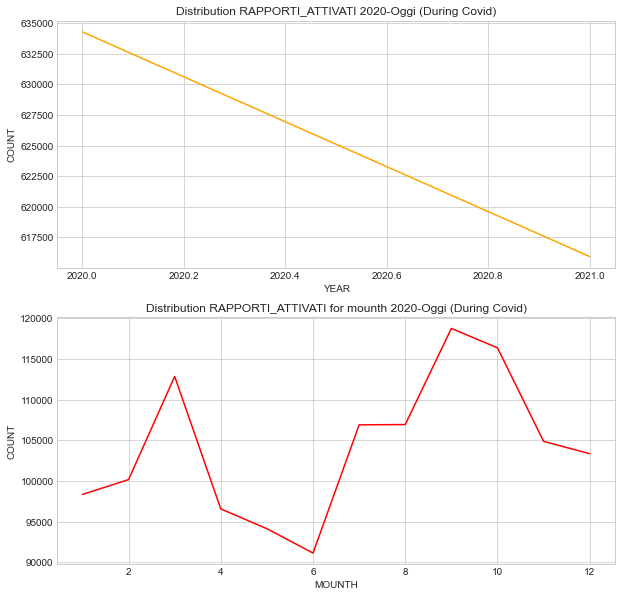

In [35]:
plt.style.use('seaborn-whitegrid')
figure = plt.figure(figsize=(10, 10))

x_dataY_DC = global_Data_YEAR_during_Covid.index
y_dataY_DC = global_Data_YEAR_during_Covid.values

x_dataM_DC = global_Data_MOUNTH_during_Covid.index
y_dataM_DC = global_Data_MOUNTH_during_Covid.values

plt.subplot(2, 1, 1)
plt.plot(x_dataY_DC, y_dataY_DC, color='orange')
plt.title('Distribution RAPPORTI_ATTIVATI 2020-Oggi (During Covid)')
plt.xlabel('YEAR')
plt.ylabel('COUNT')

plt.subplot(2, 1, 2)
plt.plot(x_dataM_DC, y_dataM_DC, color='red')
plt.title('Distribution RAPPORTI_ATTIVATI for mounth 2020-Oggi (During Covid)')
plt.xlabel('MOUNTH')
plt.ylabel('COUNT')

In [36]:
data_during_Covid_M = df_Rapporti_Attivati[(df_Rapporti_Attivati['YEAR'] > 2019) & (df_Rapporti_Attivati['GENERE'] == 'M')]
data_during_Covid_F = df_Rapporti_Attivati[(df_Rapporti_Attivati['YEAR'] > 2019) & (df_Rapporti_Attivati['GENERE'] == 'F')]

In [37]:
global_Data_YEAR_during_Covid_M = data_during_Covid_M.groupby(['MOUNTH']).GENERE.count()
global_Data_YEAR_during_Covid_F = data_during_Covid_F.groupby(['MOUNTH']).GENERE.count()

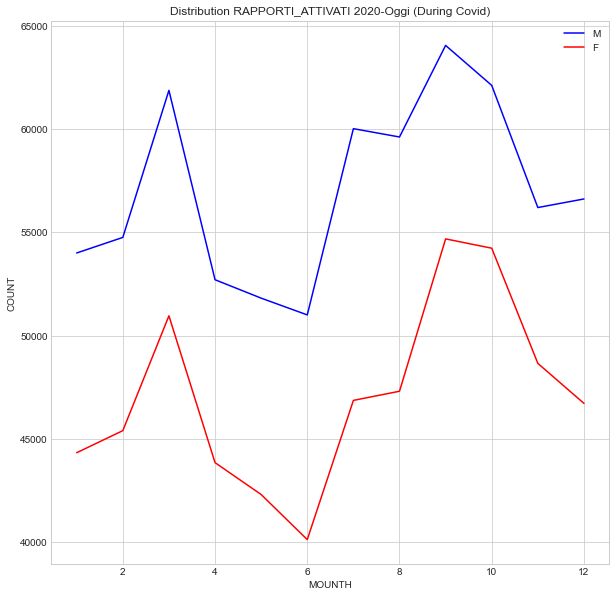

In [38]:
plt.style.use('seaborn-whitegrid')
figure = plt.figure(figsize=(10, 10))
ax = plt.axes()

x_dataY_DC_M = global_Data_YEAR_during_Covid_M.index
y_dataY_DC_M = global_Data_YEAR_during_Covid_M.values

x_dataY_DC_F = global_Data_YEAR_during_Covid_F.index
y_dataY_DC_F = global_Data_YEAR_during_Covid_F.values


ax.plot(x_dataY_DC_M, y_dataY_DC_M, color='blue', label='M')
ax.plot(x_dataY_DC_F, y_dataY_DC_F, color='red', label='F')
plt.title('Distribution RAPPORTI_ATTIVATI 2020-Oggi (During Covid)')
plt.xlabel('MOUNTH')
plt.ylabel('COUNT')
plt.legend()
